In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import plotly.express as px
import seaborn as sns
import seaborn.objects as so
import plotly.subplots 
from scipy.stats import pearsonr

In [39]:
# Graphs describing the Moti data

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL.csv")
# df.info()

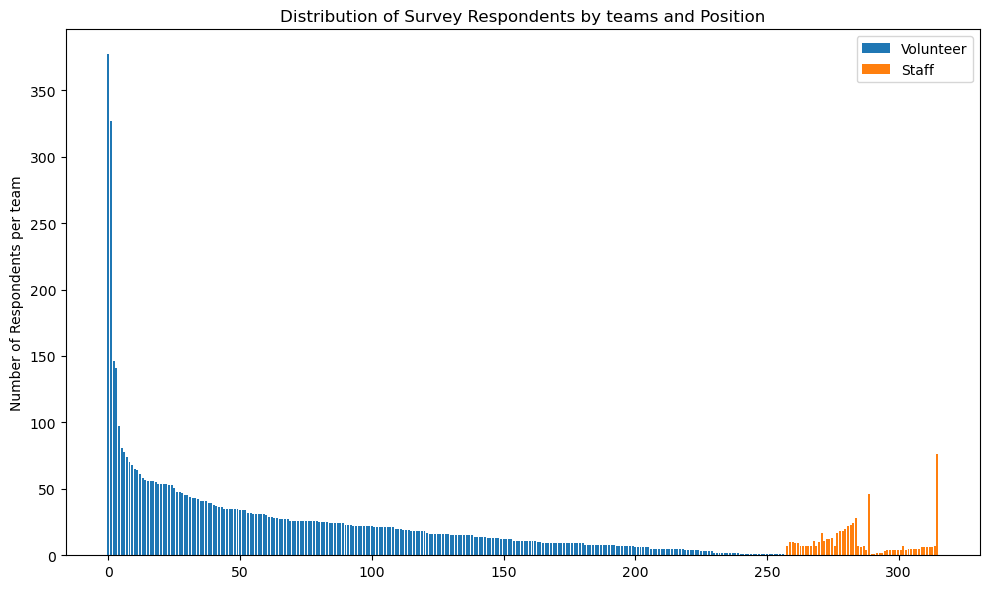

In [3]:
# Side-by-side plots comparing VOLUNTEERS and STAFF, by country: number of teams, number of respondents


# Group the dataframe by 'country' and calculate the sum of 'Volunteer' and 'Staff'
grouped_df = df.groupby('Team Name').agg({'Volunteer': 'sum', 'Staff': 'sum'}).sort_values('Staff', ascending=False).sort_values('Volunteer', ascending=False)

# Get the list of countries
teams = grouped_df.index

# Set the width of each bar
bar_width = 0.75

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create an array of indices for the x-axis positions
x = np.arange(len(teams))

# Plot the bars for volunteers
ax.bar(x, grouped_df['Volunteer'], width=bar_width, label='Volunteer')

# Plot the bars for staff
ax.bar(x + bar_width, grouped_df['Staff'], width=bar_width, label='Staff')

# Set the y-axis label
ax.set_ylabel('Number of respondents per team')

# Set the x-axis ticks and labels
#ax.set_xticks(x + bar_width / 2)
#ax.set_xticklabels(teams, rotation=90)

# Set the title
ax.set_title('Distribution of Survey Respondents by Teams and Position')

# Add a legend
ax.legend()

# Adjust the layout to accommodate the x-axis labels
plt.tight_layout()

# Show the plot
plt.show()


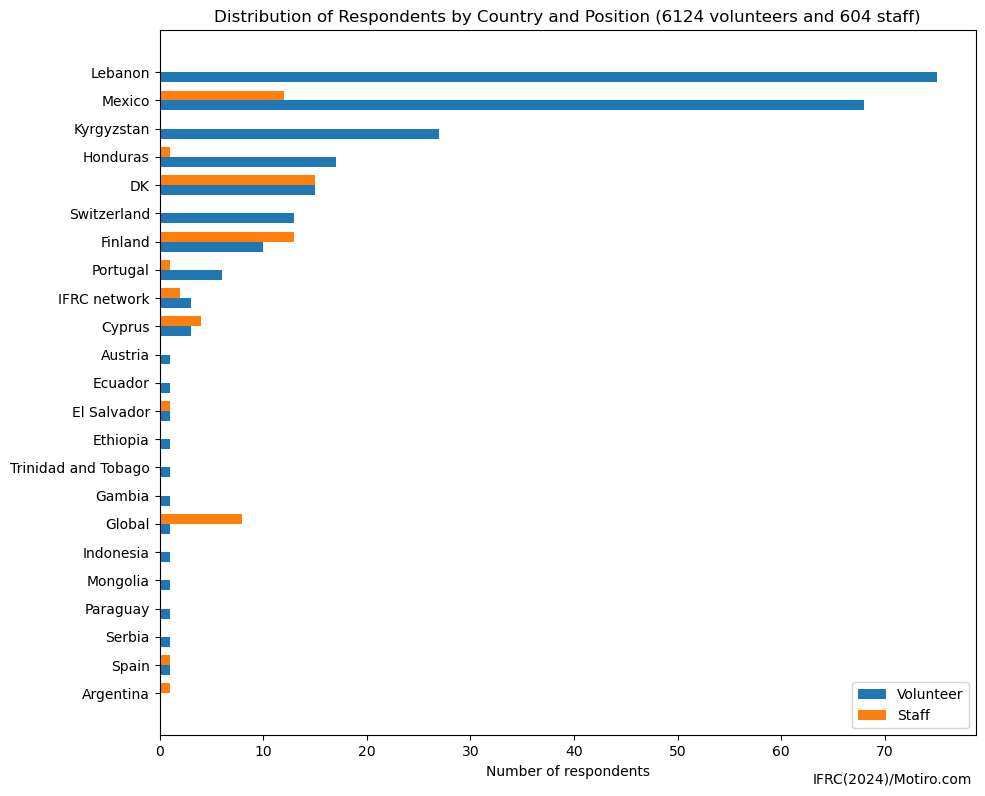

In [47]:

# Group the dataframe by 'country' and calculate the sum of 'Volunteer' and 'Staff'
grouped_df = df.groupby('country').agg({'Volunteer': 'sum', 'Staff': 'sum'}).sort_values('Volunteer', ascending=True)


# Get the list of countries
countries = grouped_df.index

# Set the height of each bar
bar_height = 0.35

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create an array of indices for the y-axis positions
y = np.arange(len(countries))

# Plot the bars for volunteers
ax.barh(y, grouped_df['Volunteer'], height=bar_height, label='Volunteer')

# Plot the bars for staff
ax.barh(y + bar_height, grouped_df['Staff'], height=bar_height, label='Staff')

# Set the y-axis ticks and labels
ax.set_yticks(y + bar_height / 2)
ax.set_yticklabels(countries)

# Set the x-axis label
ax.set_xlabel('Number of respondents')

# Set the title
ax.set_title(f'Distribution of Respondents by Country and Position ({n_vol} volunteers and {n_staff} staff)')
plt.text(63, -3, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

# Add a legend
ax.legend()

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

plt.savefig('RespondentsByCountrySorted.png')
# Show the plot
plt.show()


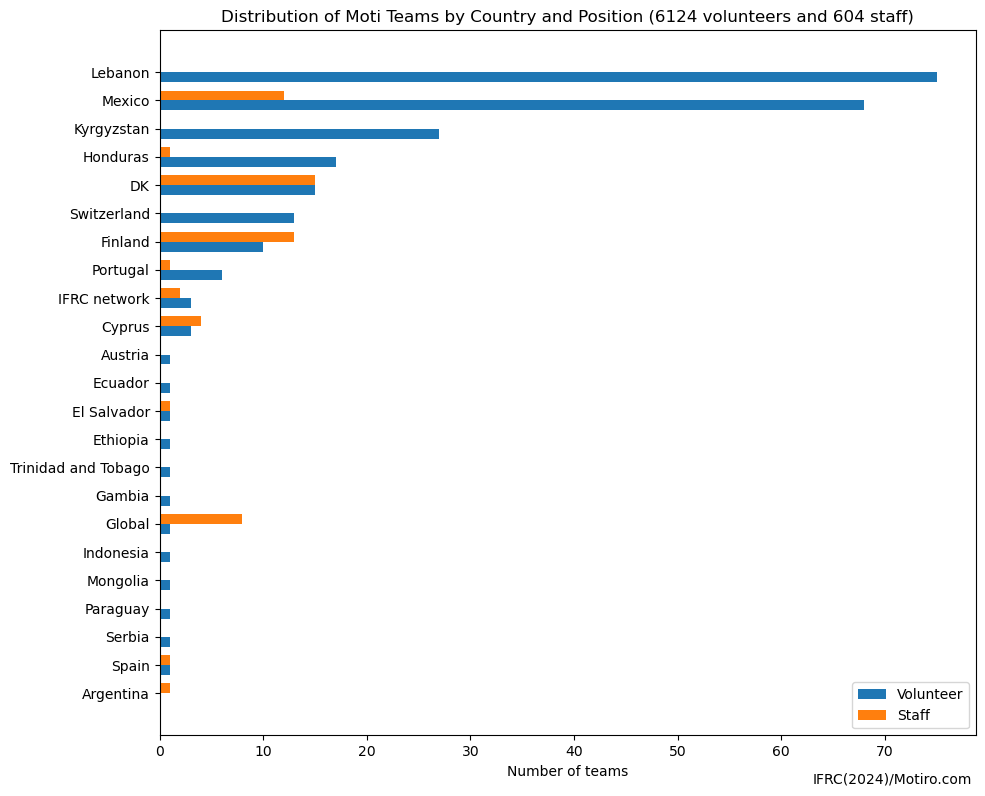

In [48]:
# bar chart with number of teams by country
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/team_ALL.csv")

# Group the dataframe by 'country' and calculate the sum of 'Volunteer' and 'Staff'
grouped_df = df.groupby('country').agg({'Volunteer': 'sum', 'Staff': 'sum'}).sort_values('Volunteer', ascending=True)

# Get the list of countries
countries = grouped_df.index

# Set the height of each bar
bar_height = 0.35

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create an array of indices for the y-axis positions
y = np.arange(len(countries))

# Plot the bars for volunteers
ax.barh(y, grouped_df['Volunteer'], height=bar_height, label='Volunteer')

# Plot the bars for staff
ax.barh(y + bar_height, grouped_df['Staff'], height=bar_height, label='Staff')

# Set the y-axis ticks and labels
ax.set_yticks(y + bar_height / 2)
ax.set_yticklabels(countries)

# Set the x-axis label
ax.set_xlabel('Number of teams')

# Set the title
ax.set_title(f'Distribution of Moti Teams by Country and Position ({n_vol} volunteers and {n_staff} staff)')
plt.text(63, -3, "IFRC(2024)/Motiro.com", fontdict={'size': 10})

# Add a legend
ax.legend()

# add bar value labels
#ax.bar_label(container[0], label_type='edge')

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

plt.savefig('TeamsByCountry.png')
# Show the plot
plt.show()


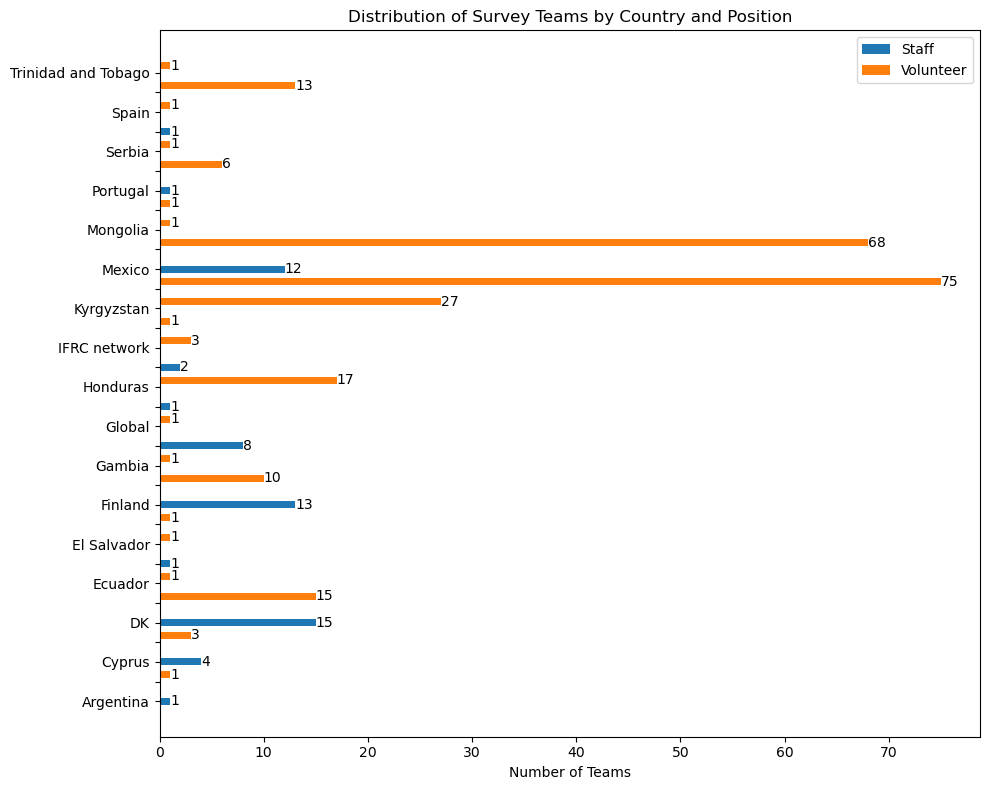

In [6]:
# Group the dataframe by 'country' and 'Position', and count the number of unique 'Team Name' occurrences
grouped_df = df.groupby(['country', 'Position']).agg({'Team Name': 'nunique'})

# Reset the index to make 'country' and 'Position' regular columns
grouped_df = grouped_df.reset_index()

# Get the list of countries
countries = grouped_df['country']

# Get the unique positions
positions = grouped_df['Position'].unique()

# Set the height of each bar
bar_height = 0.35

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create an array of indices for the y-axis positions
y = np.arange(len(countries))

# Plot the bars for volunteers
volunteer_bars = []
for i, position in enumerate(positions):
    values = np.zeros(len(countries))
    mask = (grouped_df['Position'] == position) & (grouped_df['country'].isin(countries))
    values[mask] = grouped_df[mask]['Team Name']
    bars = ax.barh(y + (i * bar_height), values, height=bar_height, label=position, )
    volunteer_bars.append(bars)

# Set the y-axis ticks and labels
ax.set_yticks(y)
ax.set_yticklabels(countries)

# Display country labels only once
for i, label in enumerate(ax.get_yticklabels()):
    if i % len(positions) != 0:
        label.set_visible(False)

# Set the x-axis label
ax.set_xlabel('Number of Teams')

# Set the title
ax.set_title('Distribution of Survey Teams by Country and Position')

# Add labels to the bars
for bars in volunteer_bars:
    for bar in bars:
        value = bar.get_width()
        if value > 0:
            ax.text(value, bar.get_y() + bar.get_height() / 2, str(int(value)),
                    ha='left', va='center')

# Add a legend
ax.legend(positions)

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

plt.savefig('TeamsByCountry.png')
# Show the plot
plt.show()


C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

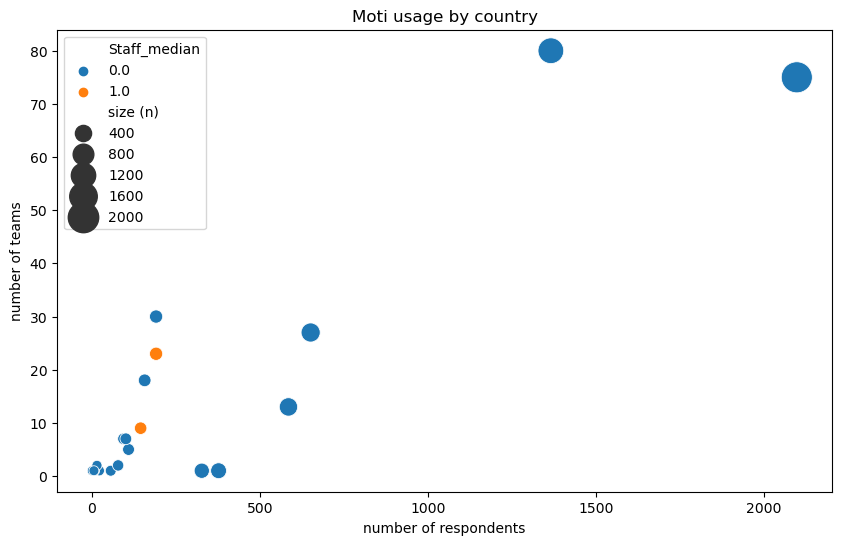

In [27]:
# SNS SCATTER PLOT COMPARING TEAM SIZES FOR STAFF AND VOLUNTEER - BY COUNTRY
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/country_ALL.csv")
   
# Convert 'TeamSize' column to numeric
df['size (n)'] = pd.to_numeric(df['size (n)'], errors='coerce')

# Create the bubble graph with Seaborn.objects
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='size (n)', y='nTeams', size='size (n)', hue='Staff_median',
                sizes=(50, 500))

# Set the labels and title
plt.xlabel('number of respondents')
plt.ylabel('number of teams')
plt.title('Moti usage by country')

# Show the legend
plt.legend()

# Save and show the plot
plt.savefig('Moti_by_country.png')
plt.show()

C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

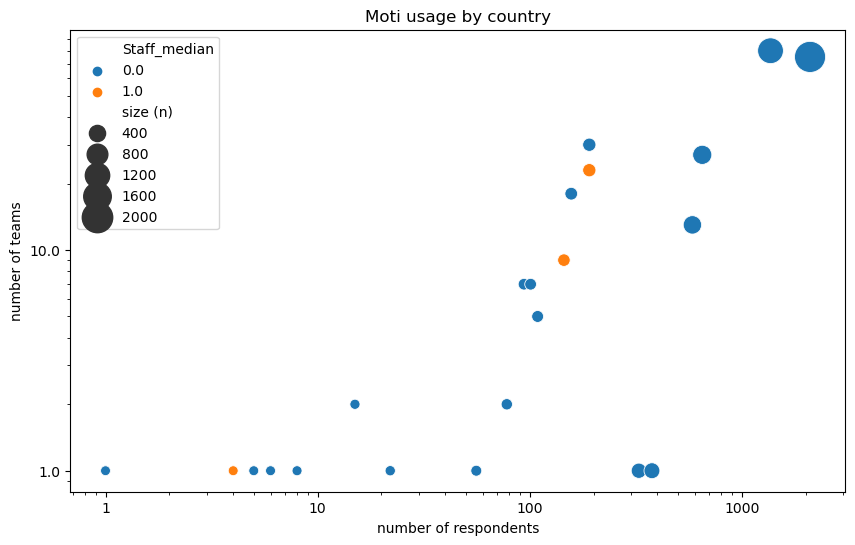

In [28]:
# SNS SCATTER PLOT COMPARING TEAM SIZES FOR STAFF AND VOLUNTEER - BY COUNTRY
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/country_ALL.csv")
   
# Convert 'TeamSize' column to numeric
df['size (n)'] = pd.to_numeric(df['size (n)'], errors='coerce')

# Create the bubble graph with Seaborn.objects
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,
                x='size (n)', y='nTeams', size='size (n)', hue='Staff_median',
                sizes=(50, 500))

# Set both axes to a log scale
plt.xscale('log')
plt.yscale('log')

# Customize the axis labels to integers
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set the labels and title
plt.xlabel('number of respondents')
plt.ylabel('number of teams')
plt.title('Moti usage by country')

# Show the legend
plt.legend()

# Save and show the plot
plt.savefig('Moti_by_country.png')
plt.show()

C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

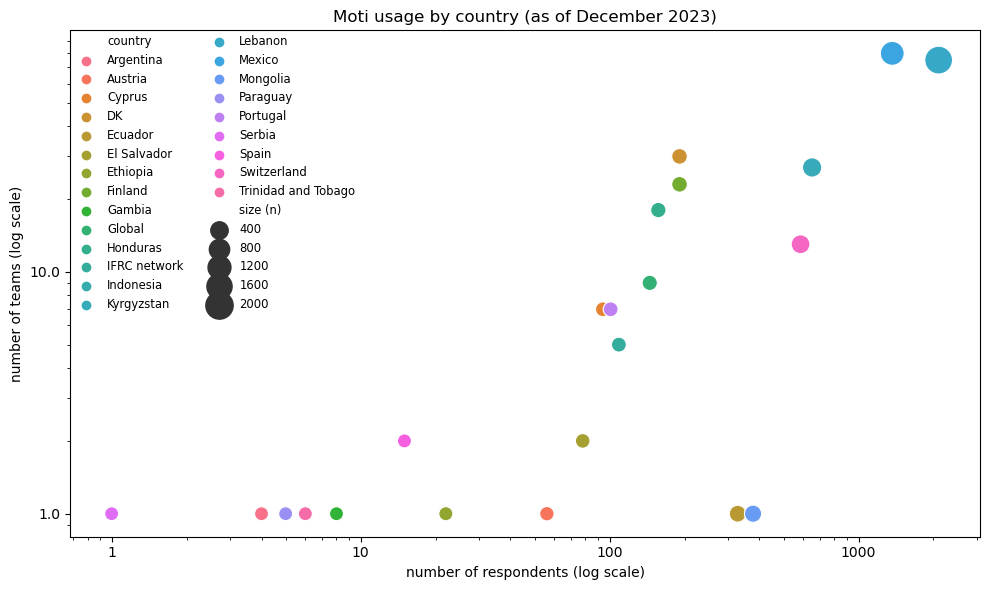

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter  # Import ScalarFormatter

# Load the data
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/country_ALL.csv")

# Convert 'TeamSize' column to numeric
df['size (n)'] = pd.to_numeric(df['size (n)'], errors='coerce')

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='size (n)', y='nTeams', hue='country', size='size (n)', sizes=(100, 400))

# Set both axes to a log scale
plt.xscale('log')
plt.yscale('log')

# Customize the axis labels to integers
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set the labels and title
plt.xlabel('number of respondents (log scale)')
plt.ylabel('number of teams (log scale)')
plt.title('Moti usage by country (as of December 2023)')

# Customize the legend
legend = plt.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.,
                    ncol=2, frameon=False, facecolor=None, fontsize='small')
#legend.set_title("Countries")

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

# Save and show the plot
plt.savefig('Moti_by_country.png')
plt.show()


C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

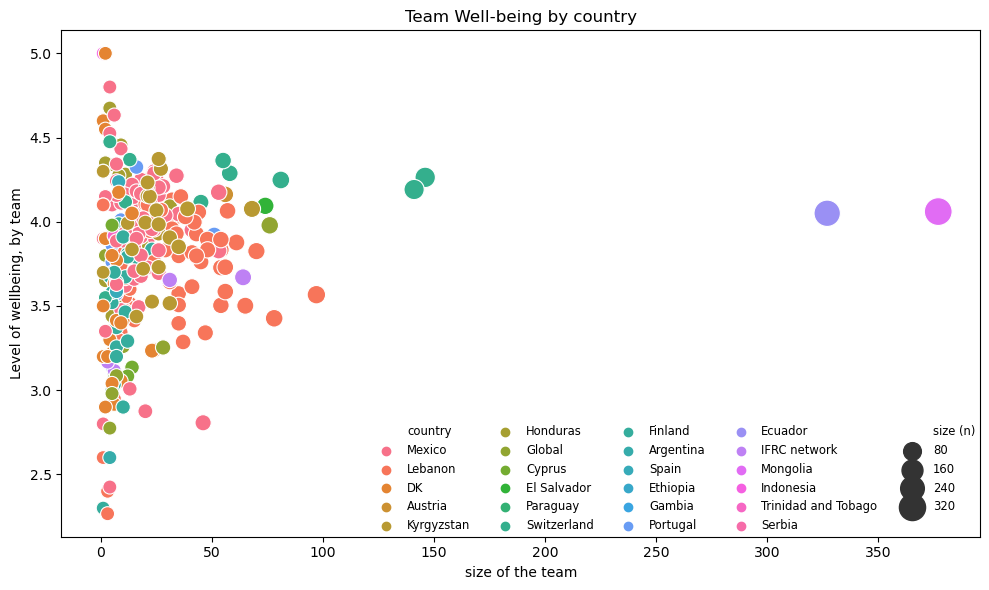

In [32]:
#Team well-being by team size

# Load the data
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/team_ALL.csv")

# Convert 'TeamSize' column to numeric
df['size (n)'] = pd.to_numeric(df['size (n)'], errors='coerce')

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='size (n)', y='Well-being', hue='country', size='size (n)', sizes=(100, 400))

# Set both axes to a log scale
#plt.xscale('log')
#plt.yscale('log')

# Customize the axis labels to integers
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set the labels and title
plt.xlabel('size of the team')
plt.ylabel('Level of wellbeing, by team')
plt.title('Team Well-being by country')

# Customize the legend
legend = plt.legend(bbox_to_anchor=(1, 0), loc='lower right', borderaxespad=0.,
                    ncol=5, frameon=False, facecolor=None, fontsize='small')
#legend.set_title("Countries")

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

# Save and show the plot
plt.savefig('Well-being_by_country.png')
plt.show()


C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\gabriel.pictet\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed i

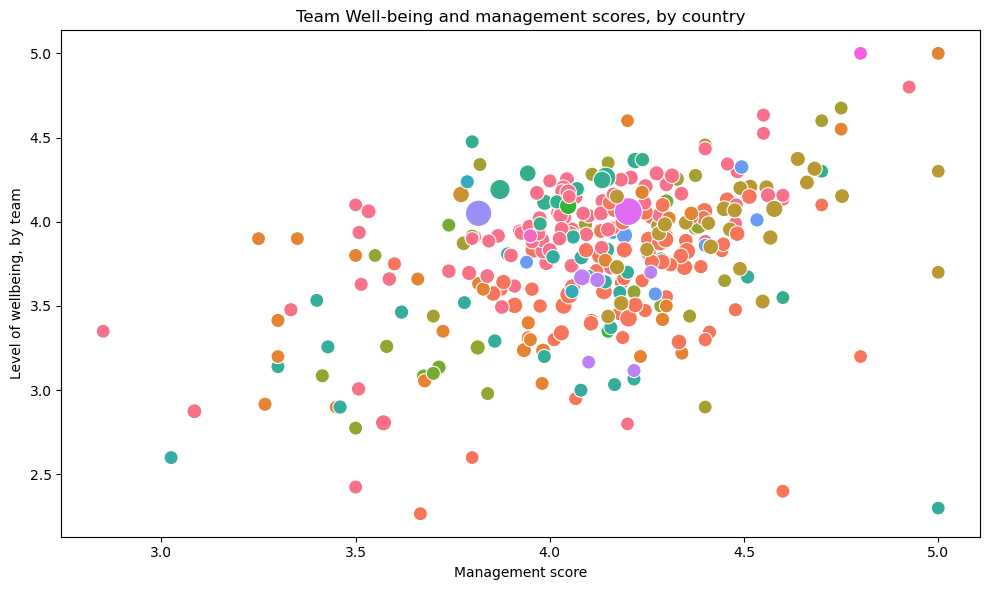

In [33]:
#Team well-being by management scores

# Load the data
df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/team_ALL.csv")

# Convert 'TeamSize' column to numeric
df['size (n)'] = pd.to_numeric(df['size (n)'], errors='coerce')

# Create the scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Management', y='Well-being',
                hue='country', size='size (n)', sizes=(100, 400),
                legend=False)

# Set both axes to a log scale
#plt.xscale('log')
#plt.yscale('log')

# Customize the axis labels to integers
plt.gca().xaxis.set_major_formatter(ScalarFormatter())
plt.gca().yaxis.set_major_formatter(ScalarFormatter())

# Set the labels and title
plt.xlabel('Management score')
plt.ylabel('Level of wellbeing, by team')
plt.title('Team Well-being and management scores, by country')

# Customize the legend
#legend = plt.legend(bbox_to_anchor=(0,1), loc='upper left', borderaxespad=0.,
#                    ncol=6, frameon=False, facecolor=None, fontsize='small')
#legend.set_title("Countries")

# Adjust the layout to accommodate the y-axis labels
plt.tight_layout()

# Save and show the plot
plt.savefig('Well-being_by_country.png')
plt.show()


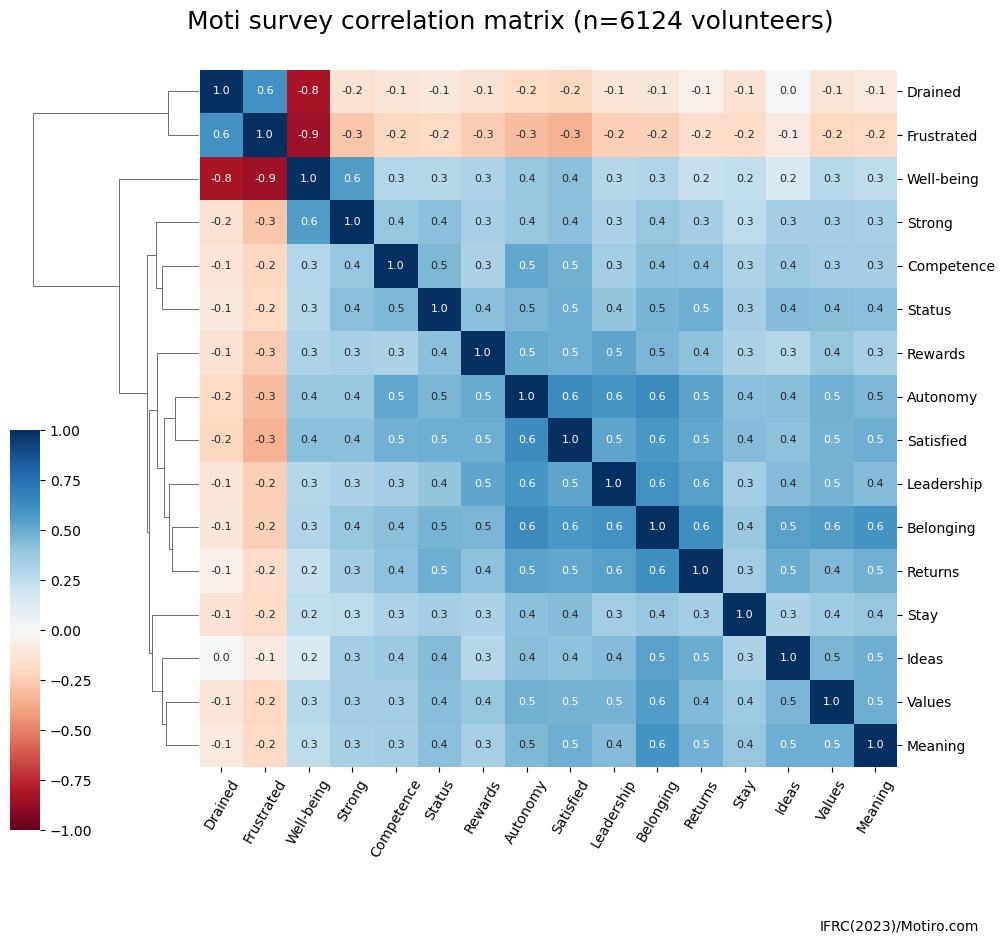

In [36]:
# Summary correlation matrix with grouped scores VOLUNTEERS

df = pd.read_csv("C:/Users/gabriel.pictet/Documents/Gabriel/REAL/Moti/Moti data/ungrouped_ALL.csv")

# Filter the dataframe for 'Position' = 'Volunteer'
df_volunteer = df[df['Position'] == 'Volunteer']

# Filter the dataframe for 'Position' = 'Staff'
df_staff = df[df['Position'] == 'Staff']

# Create a figure with two subplots
#fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))


# Count the total number of respondents (n)
n = df['Volunteer'].sum()
#n = df['Staff'].sum()

columns = ['Well-being',
           'Ideas',
           'Values',
           'Meaning',
           'Autonomy',
           'Belonging',
           'Competence',
           'Leadership',
           'Returns',
           'Rewards',
           'Status',
           'Satisfied',
           'Stay',
           'Strong',
           'Drained',
           'Frustrated']

# Create the table with the desired columns
df = df[columns]

g = sns.clustermap(df.corr(), 
                   method = 'complete', 
                   #row_cluster=False,
                   cmap   = 'RdBu', vmin=-1, vmax=1,
                   cbar_pos=(0, .05, .03, .4),
                   annot  = True , fmt=".1f",
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

g.ax_col_dendrogram.remove()

plt.suptitle(f'Moti survey correlation matrix (n={n} volunteers)',
             x=0.5, y=0.87, fontsize=18)
plt.text(27, -1.5, "IFRC(2023)/Motiro.com")

# Show the plot
plt.savefig('VOL Summary Correlation Matrix.png', bbox_inches='tight', pad_inches=0)
plt.show()
